In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import networkx as nx
from matplotlib.patches import Circle
import numpy as np
from typing import Literal

In [2]:
ind = {f'{k_upper}_{k_lower}' for k_upper in range(1, 4) for k_lower in range(1, 4) if k_lower <= k_upper}
imgs = {
    key: PIL.Image.open(f'/Users/benbarlow/dev/clustree/tests/data/input/{key}.png')
    for key in ind
}

In [4]:
dg = nx.DiGraph()
dg.add_edge(1, 2)   # adds nodes 2 and 1, i.e. no need to use add_node()
dg.add_edge(1, 3)
dg.nodes[1]["res"] = 1
dg.nodes[2]["res"] = 2
dg.nodes[3]["res"] = 2

In [5]:
pos = nx.multipartite_layout(dg, "res", align="horizontal")

In [6]:
x_vals, y_vals = [v[0] for k, v in pos.items()], [v[1] for k, v in pos.items()]
min_y, max_y = min(y_vals), max(y_vals)
min_x, max_x = min(x_vals), max(x_vals)

norm_x = [(x - min_x) / (max_x - min_x) for x in x_vals]
norm_y = [(y - min_y) / (max_y - min_y) for y in y_vals]
pos = {k: (x, 1 - y) for k, x, y in zip(list(pos.keys()), norm_x, norm_y)}

In [7]:
pos

{1: (0.5, 1.0), 3: (0.0, 0.0), 2: (1.0, 0.0)}

In [8]:
def get_pixels(fig):
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    pixels_width, pixels_height = int(width * dpi), int(height * dpi)
    print(f"Number of pixels: {pixels_width} x {pixels_height}")

def get_dpi(fig):
    dpi = fig.get_dpi()
    print(f"Figure dpi: {dpi}")

def get_size(fig):
    width, height = fig.get_size_inches()
    print(f"Figure size: {width} x {height} inches")

def get_fig_info(info, fig=None):
    if not fig:
        fig = plt.gcf()
    if info == "pixels":
        get_pixels(fig)
    elif info == "size":
        get_size(fig)
    elif info == "dpi":
        get_dpi(fig)

def data_to_disp(coord):
    ax = plt.gca()
    return ax.transData.transform(coord)

def disp_to_data(coord):
    ax = plt.gca()
    return ax.transData.inverted().transform(coord)

def fig_to_disp(coord):
    fig = plt.gcf()
    return fig.transFigure.transform(coord)

def disp_to_fig(coord):
    fig = plt.gcf()
    return fig.transFigure.inverted().transform(coord)

def ax_to_disp(coord):
    ax = plt.gca()
    ax.transAxes.transform(coord)
    
def disp_to_ax(coord):
    ax = plt.gca()
    ax.transAxes.inverted().transform(coord)

In [9]:
pos_1000 = {k: (x * 1000, y * 1000) for k, (x, y) in pos.items()}

/var/folders/7y/2xjb3t2n09d1ns7_wfm4kc4w0000gn/T/ipykernel_4875/331000536.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


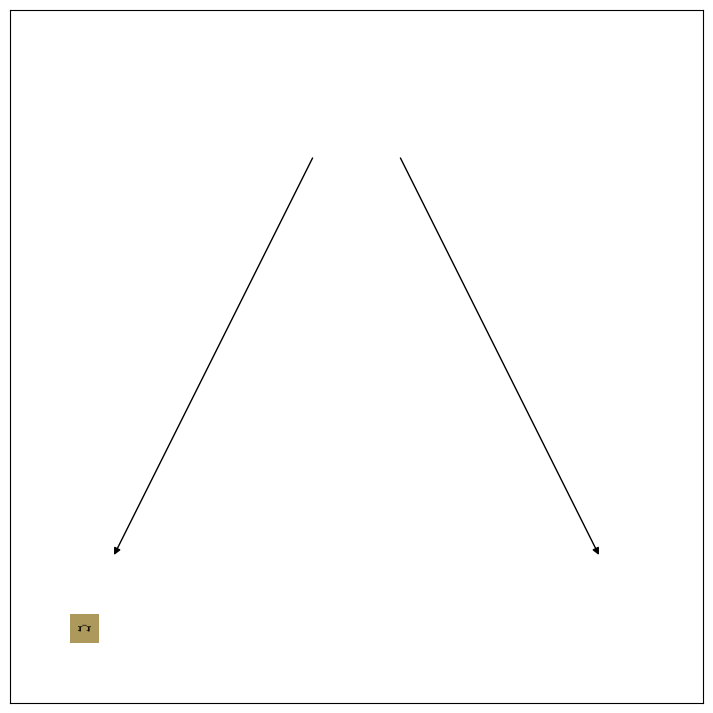

In [16]:
# par: multiplier of node size

fig_sz = 9
fig, ax = plt.subplots(
    figsize=(fig_sz,fig_sz),
    dpi=100
)
# plot image (use multiplier)

node_size_relative = fig_sz * 200
nx.draw_networkx_edges(dg, pos_1000, ax=ax, node_shape='s', node_size=default_node_size * multiplier)
#nx.draw_networkx_nodes(dg, pos_1000, ax=ax, node_shape='s', node_size=node_size_relative)
pxl_x = 400
pxl_y = 400

circle = Circle((0, 0), 0.01, facecolor='red', edgecolor='black', zorder=10)
ax.add_patch(circle)

ax.imshow(imgs['1_1'], origin="lower", extent=[0, 50, 0, 50])
#ax.axis("off")

ax.autoscale()
fig.show()

In [11]:
get_fig_info("size")

Figure size: 6.4 x 4.8 inches


<Figure size 640x480 with 0 Axes>

In [12]:
get_fig_info("pixels")

Number of pixels: 640 x 480


<Figure size 640x480 with 0 Axes>

In [13]:
get_fig_info("dpi")

Figure dpi: 100.0


<Figure size 640x480 with 0 Axes>

In [19]:
imgs.keys()

dict_keys(['2_1', '2_2', '3_1', '1_1', '3_3', '3_2'])

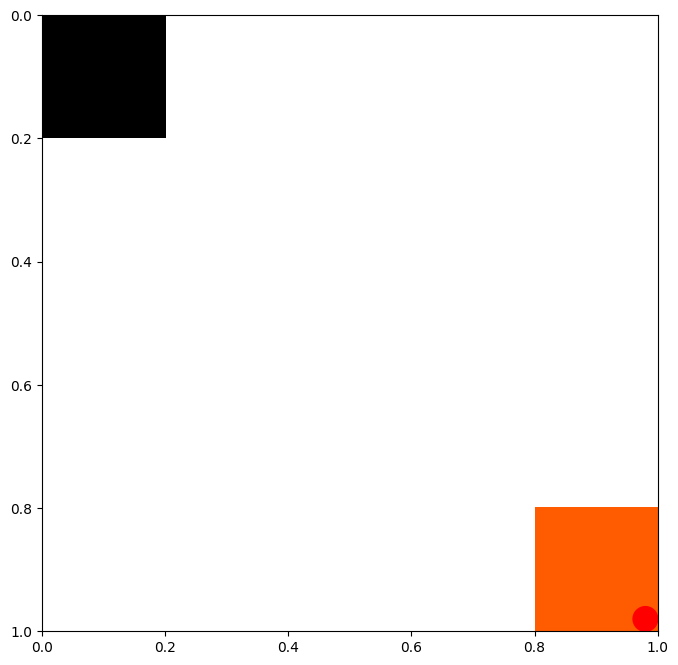

In [48]:
# create two example images
img1 = np.full((30, 30), 150)
img2 = np.full((30, 30), 55)

# create a figure with a single axes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# plot the first image using .imshow() and set its location using extent
ax.imshow(img1, cmap='gray', extent=[0, 0.2, 0, 0.2])

# plot the second image using .imshow() and set its location using extent
ax.imshow(img2, cmap='hot', extent=[0.8, 1, 0.8, 1], vmin=50, vmax=60)

radius = 0.02
# tblr in pos
circle = plt.Circle(np.array((1 - radius, 1 - radius)), radius=radius, fill=True, color="red")
ax.add_artist(circle)


# set the x and y axis limits to show the whole images
ax.set_xlim([0, 1])
ax.set_ylim([1, 0])

# show the figure
plt.show()

In [84]:
def get_circle_centre_relative(radius, pos):
    """
    Centre with x,y in (0,1) interval.
    """
    pos_dict = {
        'tl': (radius, 1 - radius),
        't': (0.5, 1 - radius),
        'tr': (1 - radius, 1 - radius),
        'l': (radius, 0.5),
        'r': (1 - radius, 0.5),
        'bl': (radius, radius),
        'b': (0.5, radius),
        'br': (1 - radius, radius)
    }
    center = np.array(pos_dict[pos])
    return center

def get_circle_centre(radius: float, pos: Literal['tl', 't', 'tr', 'l', 'r', 'bl', 'b', 'br'], bl_anchor: tuple[float, float], length: float) -> tuple[float, float]:
    b, l = bl_anchor
    r, t = l + length, b + length
    pos_dict = {
        'tl': (l + radius, t - radius),
        't': (l + (length / 2), t - radius),
        'tr': (r - radius, t - radius),
        'l': (l + radius, b + (length / 2)),
        'r': (r - radius, b + (length / 2)),
        'bl': (l + radius, b + radius),
        'b': (l + (length / 2), b + radius),
        'br': (r - radius, b + radius)
    }
    return pos_dict[pos]

In [38]:
def get_extent(bl_anchor, length):
    return [bl_anchor[0], bl_anchor[0] + length, bl_anchor[1], bl_anchor[1] + length]

In [71]:
bl_anchor = (0, 0)

In [72]:
get_circle_centre(radius=radius, pos='tr', bl_anchor=bl_anchor, length=length)

array([0.18, 0.18])

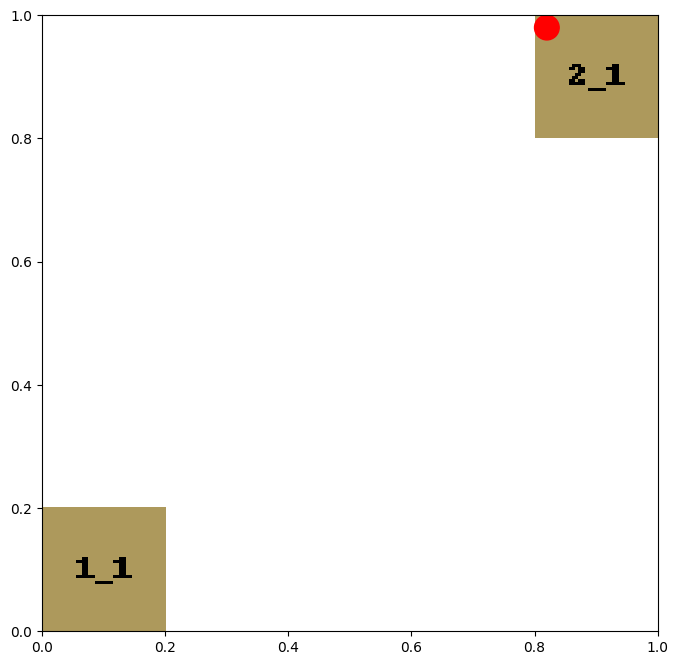

In [89]:
img1 = imgs['1_1']
img2 = imgs['2_1']

length = 0.2

# create a figure with a single axes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# plot the first image using .imshow() and set its location using extent
bl_anchor = (0, 0)
ax.imshow(img1, extent=get_extent(bl_anchor=bl_anchor, length=length))


# plot the second image using .imshow() and set its location using extent
bl_anchor = (0.8, 0.8)
ax.imshow(img2, extent=get_extent(bl_anchor=bl_anchor, length=length))
circle = plt.Circle((
    get_circle_centre(radius=radius, pos='tl', bl_anchor=bl_anchor, length=length)),
    radius=radius,
    fill=True,
    color="red"
)
ax.add_artist(circle)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.show()

In [90]:
dg

NameError: name 'dg' is not defined